In [9]:
import pandas as pd
import glob

path = "./raw_data/"

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

#df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], dayfirst=True)

#df = df[df['Location of Monitoring Station'].isin(['Kathivakkam, Municipal Kalyana Mandapam, Chennai'])]
df = df[df['Location of Monitoring Station'].isin(['Thiruvottiyur,  Chennai'])]
#df = df[df['Location of Monitoring Station'].isin(['Kathivakkam, Municipal Kalyana Mandapam, Chennai', 'Govt. High School, Manali, Chennai.','Thiruvottiyur,  Chennai'])]

In [10]:
df=df.drop(['State','City/Town/Village/Area','Agency', 'Type of Location', 'Stn Code'], axis=1)

In [11]:
df
df.to_csv('tempppp.csv')

C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_45980\1032752188.py:11: UserWarning: Parsing '14/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_45980\1032752188.py:11: UserWarning: Parsing '19/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_45980\1032752188.py:11: UserWarning: Parsing '21/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_45980\1032752188.py:11: UserWarning: Parsing '28/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_

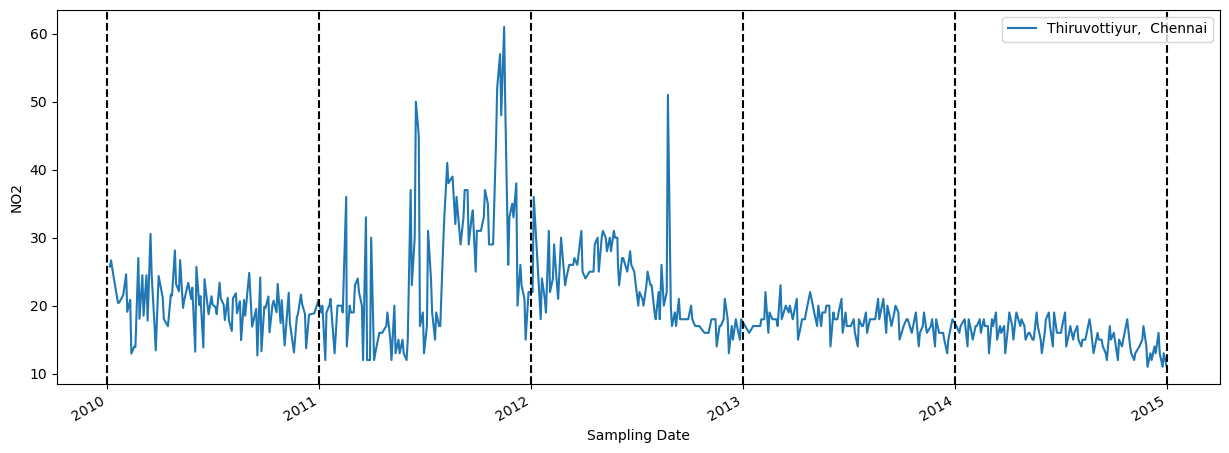

In [12]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load data from CSV file
df = pd.read_csv('tempppp.csv')

# Convert Sampling Date column to datetime object
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

# Pivot table and interpolate missing values
pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
pivot_df = pivot_df.interpolate(method='linear')

# Plot the data
pivot_df.plot()
plt.legend()
#plt.ylim(top=100)
plt.ylabel('NO2')
plt.rcParams["figure.figsize"] = (15,5.5)

# Add vertical lines for the start of each year
xcoords = [datetime(2010,1,1), datetime(2011,1,1), datetime(2012,1,1), datetime(2013,1,1), datetime(2014,1,1), datetime(2015,1,1)]
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

plt.show()


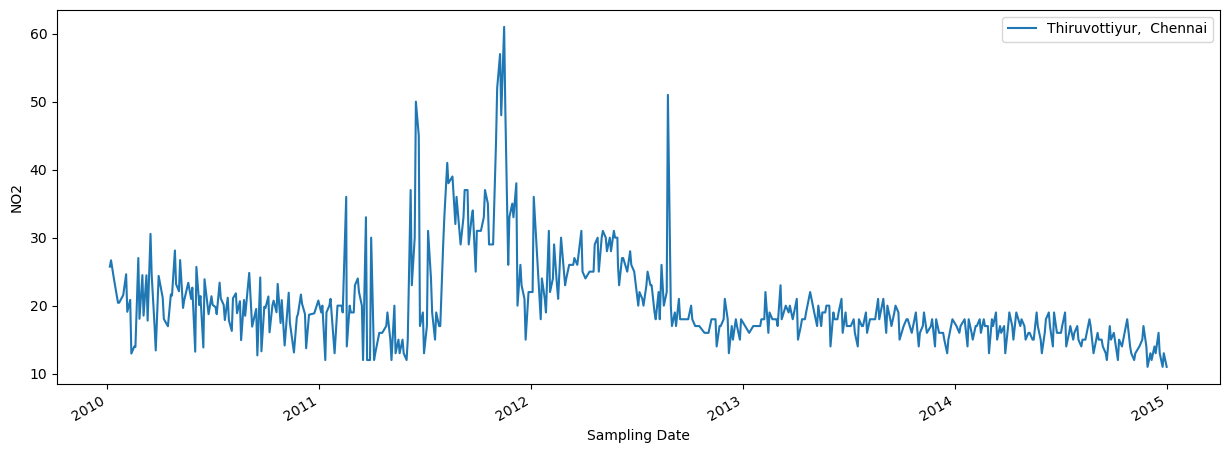

In [13]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
pivot_df = pivot_df.interpolate(method='linear')
pivot_df.plot()
plt.legend()
#plt.ylim(top=100)
plt.ylabel('NO2')
plt.rcParams["figure.figsize"] = (15,5.5)
'''
xcoords = ['2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
'''
plt.show()

In [14]:
print(df)

print(df.dtypes)

df['Sampling Date'] = np.where(df['Sampling Date'].str.contains('/'), pd.to_datetime(df['Sampling Date']).dt.strftime('%m/%d/%Y'), pd.to_datetime(df['Sampling Date'], dayfirst=True).dt.strftime('%m/%d/%Y'))
df=df.set_index('Sampling Date')

import pandas as pd
print(df)
#df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

#df = df.sort_values(['Location of Monitoring Station', 'Sampling Date'], ascending=[True, True])

df.to_csv('data.csv')

print(df.index)



     Unnamed: 0 Sampling Date Location of Monitoring Station        SO2  \
0           202    2010-01-06        Thiruvottiyur,  Chennai  14.750000   
1           203    2010-01-08        Thiruvottiyur,  Chennai  15.066667   
2           204    2010-01-13        Thiruvottiyur,  Chennai  13.600000   
3           205    2010-01-20        Thiruvottiyur,  Chennai  11.483333   
4           206    2010-01-22        Thiruvottiyur,  Chennai  11.633333   
..          ...           ...                            ...        ...   
462        7448    2014-12-17        Thiruvottiyur,  Chennai  10.000000   
463        7449    2014-12-19        Thiruvottiyur,  Chennai  12.000000   
464        7450    2014-12-24        Thiruvottiyur,  Chennai  12.000000   
465        7451    2014-12-26        Thiruvottiyur,  Chennai  13.000000   
466        7452    2014-12-31        Thiruvottiyur,  Chennai  11.000000   

           NO2   RSPM/PM10         SPM  PM 2.5  
0    25.733333  105.000000  353.666667     NaN  
1

AttributeError: Can only use .str accessor with string values!

In [ ]:
import pandas as pd

# Read CSV file
df = pd.read_csv('data.csv')

# Convert "Sampling Date" column to datetime format
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

# Sort dataframe by location and date
df = df.sort_values(['Location of Monitoring Station', 'Sampling Date'], ascending=[True, True])

# Save sorted dataframe as a CSV file
df.to_csv('sorted_data.csv', index=False)


In [ ]:
df2 = df.loc[:, 'NO2'].to_frame()

print(df2)

df2['NO2'] = df2['NO2'].interpolate(option='spline')

df2.to_csv('azure_train.csv')

df2['y'] = df2['NO2'].shift(-1)
print(df2.index)

print(df2.head(20))

In [ ]:
train = df2[:400]
test = df2[400:]
test = test.drop(test.tail(1).index) # Drop last row
print(f'Shape of training set: {train.shape}')
print(f'Shape of test set: {test.shape}')

In [ ]:
test = test.copy()

test['baseline_pred'] = test['NO2']
print(test)

test.interpolate(method='linear', inplace=True)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train = train['NO2'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['NO2'].values.reshape(-1,1)
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

print(test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
test['gbr_pred'] = gbr_pred
print(test)

test.to_csv('lkamsldf.csv')

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

import numpy as np

baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['NO2'], test['gbr_pred'])
# Generate bar plot
fig, ax = plt.subplots(figsize=(7, 5))
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')
    


plt.show()